### Import Necessary Module and Set Path 

In [1]:
import sqlite3 as lite
import os
import sys
from pyne import nucname
sys.path.insert(0, '../scripts/')
jupyter_directory = os.getcwd()

In [2]:
import analysis as an

## Run Cyclus Input file

In [3]:
! rm cyclus.sqlite
! cyclus eg01-eg24-cycamore.xml

              :                                                               
          .CL:CC CC             _Q     _Q  _Q_Q    _Q    _Q              _Q   
        CC;CCCCCCCC:C;         /_\)   /_\)/_/\\)  /_\)  /_\)            /_\)  
        CCCCCCCCCCCCCl       __O|/O___O|/O_OO|/O__O|/O__O|/O____________O|/O__
     CCCCCCf     iCCCLCC     /////////////////////////////////////////////////
     iCCCt  ;;;;;.  CCCC                                                      
    CCCC  ;;;;;;;;;. CClL.                          c                         
   CCCC ,;;       ;;: CCCC  ;                   : CCCCi                       
    CCC ;;         ;;  CC   ;;:                CCC`   `C;                     
  lCCC ;;              CCCC  ;;;:             :CC .;;. C;   ;    :   ;  :;;   
  CCCC ;.              CCCC    ;;;,           CC ;    ; Ci  ;    :   ;  :  ;  
   iCC :;               CC       ;;;,        ;C ;       CC  ;    :   ; .      
  CCCi ;;               CCC        ;;;.      .C ;   

### The output file should be named 
         
          cyclus.sqlite

In [4]:
filename = 'cylcus.sqlite'
# Wait for the complete message to move on
cur = an.get_cursor(filename)
# get simulation time info
init_year, init_month, duration, timestep = an.get_sim_time_duration(cur)

# prints net capacity and number of reactor timeseries
an.plot_power(cur)

# get tailings mass timeseries
agent_ids = an.get_agent_ids('enrichment')
tailings = an.facility_commodity_flux(cur, agent_ids,
                                        ['tailings'], True)
an.stacked_bar_chart(tailings, timestep,
                  'Year', 'Mass [MTHM]',
                  'Tailings vs Time',
                  'tailings', init_year)

# get fuel mass timeseries
fuel_dict = an.fuel_usage_timeseries(cur, ['uox', 'mox'])
an.stacked_bar_chart(fuel_dict, timestep,
                  'Years', 'Mass[MTHM]',
                  'Total Fuel Mass vs Time',
                  'total_fuel',
                  init_year)

# uranium utilization
dictionary = {}
dictionary['uranium_utilization'] = an.u_util_calc(cur)
an.stacked_bar_chart(dictionary, timestep,
                     'Years', 'U Utilization Factor',
                     'U Utilization vs Time',
                     'u_util', init_year)

# get reprocessed material flow
agent_ids = an.get_agent_ids('separations')
combined = an.facility_commodity_flux(cur, agent_ids, ['mox_Pu', 'uox_Pu'], True)
from_spent_uox = an.facility_commodity_flux(cur, agent_ids, ['uox_Pu'], True)
from_spent_mox = an.facility_commodity_flux(cur, agent_ids, ['mox_Pu'], True)
an.stacked_bar_chart(combined, timestep, 'Years', 'Mass[MTHM]',
                  'Total reprocessed outflux vs Time', 'combined',
                  init_year)
an.stacked_bar_chart(from_spent_uox, timestep, 'Years', 'Mass[MTHM]',
                  'reprocessed from spent UOX vs Time', 'from_spent_uox',
                  init_year)
an.stacked_bar_chart(from_spent_mox, timestep, 'Years', 'Mass[MTHM]',
                  'reprocessed from spent MOX vs Time', 'from_spent_mox',
                  init_year)

print('Finished!')

OrderedDict([('sink_source_facilities', array([0, 0, 0, ..., 0, 0, 0])), ('lwr_inst', array([ 0.,  0.,  0., ...,  0.,  0.,  0.])), ('fr_inst', array([   0. ,    0. ,    0. , ...,  397.6,  397.6,  391.2])), ('lwr_new_inst', array([ 0.,  0.,  0., ...,  0.,  0.,  0.]))])
OrderedDict([('sink_source_facilities', array([0, 0, 0, ..., 0, 0, 0])), ('lwr_inst', array([0, 0, 0, ..., 0, 0, 0])), ('fr_inst', array([   0,    0,    0, ..., 1742, 1742, 1726])), ('lwr_new_inst', array([0, 0, 0, ..., 0, 0, 0]))])
sink_source_facilities has no values
sink_source_facilities has no values
mox has no values
The Simulation Average Uranium Utilization is:
0.154665215057
Finished!


In [3]:
# Number of Reactors Deployed
cur = an.get_cursor(filename)
lwr = cur.execute('SELECT count(*) FROM agententry '
                  'WHERE prototype = "lwr"').fetchone()
print('The Number of LWRs Deployed:')
print(lwr[0])

sfr = cur.execute('SELECT count(*) FROM agententry '
                  'WHERE prototype = "fr"').fetchone()
print('The Number of FRs Deployed:')
print(sfr[0])

NameError: name 'filename' is not defined

In [ ]:
# Fresh and Spent Fuel Composition
cur = an.get_cursor(filename)

sfr_fuel_qualid = cur.execute('SELECT qualid FROM transactions '
                              'INNER JOIN resources ON '
                              'resources.resourceid = transactions.resourceid '
                              'WHERE commodity = "sfr_fuel"').fetchone()
fresh_sfr_mox_comp = cur.execute('SELECT nucid, massfrac FROM compositions '
                                 'WHERE qualid = ' + str(sfr_fuel_qualid[0])).fetchall()
print('Composition for fresh sfr fuel: ')
for isotope in fresh_sfr_mox_comp:
    print(nucname.name(isotope[0]) + ': ' + str(isotope[1] * 100) + ' %')

print('\n \n')

sfr_waste_comp = cur.execute('SELECT nucid, massfrac FROM recipes '
                             'LEFT OUTER JOIN compositions '
                             'ON recipes.qualid = compositions.qualid '
                             'WHERE recipe = "sfr_waste_recipe"').fetchall()
print('Composition for fresh sfr spent fuel: ')
for isotope in sfr_waste_comp:
    print(nucname.name(isotope[0]) + ': ' + str(isotope[1] * 100) + ' %')

### Plots

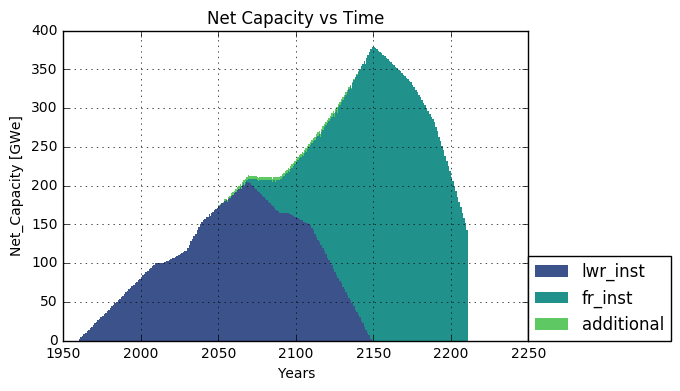

In [19]:
# Display Net Capacity vs Time
from IPython.display import Image
Image(filename='power_plot.png')

# Display Number of Reactors vs Time
from IPython.display import Image
Image(filename='number_plot.png')

# Display Tailings vs Time
from IPython.display import Image
Image(filename='tailings.png')

# Display Total Fuel vs Time
from IPython.display import Image
Image(filename='total_fuel.png')

# Display Uranium Utilization vs Time
from IPython.display import Image
Image(filename='u_util.png')

# Display Separated Pu Flow
from IPython.display import Image
Image(filename='combined.png')

from IPython.display import Image
Image(filename='from_spent_mox.png')

from IPython.display import Image
Image(filename='from_spent_uox.png')